In [13]:
import yaml
import os
import random

data_config = open('../data/IndoorObjectsDetection/data.yaml')

data_info = yaml.load(data_config, Loader=yaml.FullLoader)

train_data_path = data_info['train_data_path']
val_data_path = data_info['val_data_path']
test_data_path = data_info['test_data_path']

train_labels_path = data_info['train_labels_path']
val_labels_path = data_info['val_labels_path']
test_labels_path = data_info['test_labels_path']

target_list = data_info['names']
target_dict = dict(zip(range(len(target_list)), target_list))

color_list = []
for _ in range(len(target_list)):
    color_list.append((random.randrange(0,256),random.randrange(0,256),random.randrange(0,256)))

color_dict = dict(zip(target_list, color_list))

target_dict

{0: 'door',
 1: 'cabinetDoor',
 2: 'refrigeratorDoor',
 3: 'window',
 4: 'chair',
 5: 'table',
 6: 'cabinet',
 7: 'couch',
 8: 'openedDoor',
 9: 'pole'}

In [2]:
import numpy as np

def set_bounding_boxes (image_data : np.ndarray, 
                        bbox_info_list : np.ndarray,
                        bbox_info_format : str,
                        category_list : np.ndarray, 
                        category_dict : dict,
                        color_dict : dict) -> np.ndarray:
    """
    Parameters
    ----------
    image_data (numpy.ndarray)
        image data in numpy.ndarray type
    bbox_info_list (numpy.ndarray)
        bounding box infomation in numpy.ndarray type with (n,4) shape
    bbox_info_format (str)
        'yolo' | 'coco' | ...
    category_list (numpy.ndarray)
        key of target class in numpy.ndarray type with (n,) shape
    category_dict (dict)
        dictionary created from class number(key : int) and class names(value : str)
    color_dict (dict)
        dictionary created from class names(key : int) and RGB color tuple(value : tuple)
        
    Returns
    --------
    img (numpy.ndarray)
        image where object is displayed as a square label
    """
    
    img = image_data.copy()
    
    for bbox_info, category in zip(bbox_info_list, category_list):
        set_bounding_box(img, bbox_info, category_dict[category], bbox_info_format, color_dict)
    
    return img

def set_bounding_box (image_data, 
                      bounding_box_info, 
                      category_name, 
                      bbox_info_format, 
                      color_dict):
    
    h, w, _ = image_data.shape
    
    if(bbox_info_format == 'yolo'):
        x_center_ratio = bounding_box_info[0]
        y_center_ratio = bounding_box_info[1]
        width_ratio = bounding_box_info[2]
        height_ratio = bounding_box_info[3]

        x_min = int(w * x_center_ratio - (w * width_ratio / 2))
        x_max = int(w * x_center_ratio + (w * width_ratio / 2))
        y_min = int(h * y_center_ratio - (h * height_ratio / 2))
        y_max = int(h * y_center_ratio + (h * height_ratio / 2))
    
    cv2.rectangle(image_data, (x_min, y_min), (x_max, y_max), color_dict[category_name], 3)
    
    ((text_width, text_height), _) = cv2.getTextSize(category_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(image_data, (x_min, y_min - int(1.3 * text_height)), (x_min + int(1.1 * text_width), y_min), color_dict[category_name], -1)
    cv2.putText(
        image_data,
        text=category_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.55, 
        color=(255,255,255), 
        lineType=cv2.LINE_AA,
    )
    
    return image_data

def get_random_color_dict (category_dict):
    color_list = []
    target_list = list(category_dict.values())

    for _ in range(len(category_dict)):
        color_list.append((random.randrange(0,256),random.randrange(0,256),random.randrange(0,256)))

    color_dict = dict(zip(target_list, color_list))
    
    return color_dict


[[0.470884 0.648887 0.62333  0.15793 ]
 [0.665864 0.325658 0.092881 0.432565]
 [0.869141 0.936198 0.197266 0.122396]
 [0.881836 0.632812 0.1875   0.53125 ]]
[5 3 2 2]


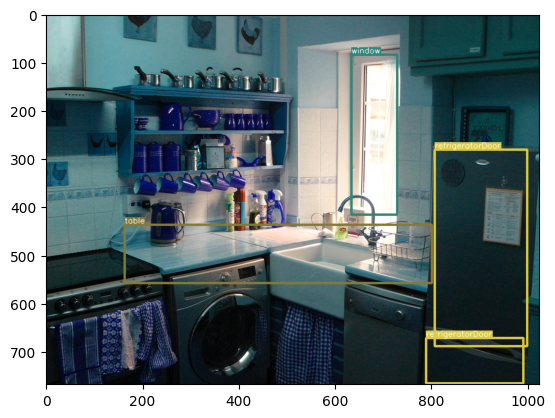

In [10]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

file = os.listdir(train_data_path)[3]

img_path = train_data_path + '/' + file
labels_path = train_labels_path + '/' + file.split('.')[0] + '.txt'

image = cv2.imread(img_path)
bb_df = pd.read_csv(labels_path, sep=' ', header=None)

class_arr = np.asarray(bb_df[0])
bb_info_arr = np.asarray(bb_df[[1,2,3,4]])

color_dict = get_random_color_dict(target_dict)

res = set_bounding_boxes(image, bb_info_arr, 'yolo', class_arr, target_dict, color_dict)

print(bb_info_arr)
print(class_arr)
plt.imshow(res)

In [4]:
files = os.listdir(train_data_path)

for img_file in files:
    labels_file_path = train_labels_path + '/' + img_file.split('.')[0] + '.txt'
    
    try:
        labels_dp = pd.read_csv(labels_file_path)
        
    except Exception as e:
        continue

[[0.088594 0.919824 0.139434 0.14582 ]]
[3]
[[[ 49  47  46]
  [ 29  32  30]
  [ 42  55  53]
  ...
  [ 32  41  28]
  [ 31  36  27]
  [ 29  33  28]]

 [[ 60  67  60]
  [ 32  40  33]
  [ 38  54  47]
  ...
  [ 29  35  24]
  [ 28  29  25]
  [ 27  28  26]]

 [[ 62  78  67]
  [ 29  45  34]
  [ 30  49  40]
  ...
  [ 31  31  25]
  [ 31  29  29]
  [ 32  29  31]]

 ...

 [[130 134 122]
  [101 102  92]
  [ 93  90  82]
  ...
  [ 17  34 113]
  [ 18  36 113]
  [ 20  36 113]]

 [[116 121 112]
  [ 89  92  83]
  [ 87  86  76]
  ...
  [ 18  31 107]
  [ 22  32 110]
  [ 23  33 111]]

 [[120 128 121]
  [ 93 101  91]
  [ 93  94  84]
  ...
  [ 21  27 102]
  [ 20  26 103]
  [ 19  25 102]]]


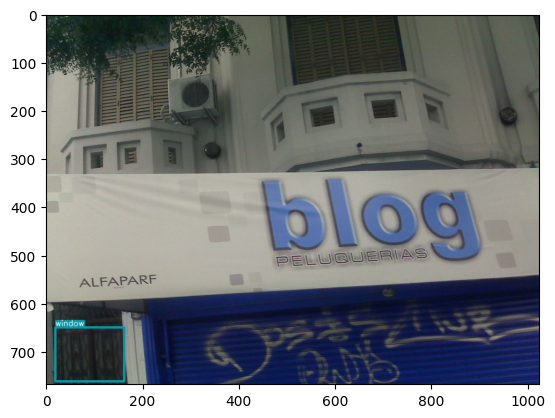

In [14]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

file = '0cddd3b472bc04cc.jpg'

img_path = train_data_path + '/' + file
labels_path = train_labels_path + '/' + file.split('.')[0] + '.txt'

image = cv2.imread(img_path)
bb_df = pd.read_csv(labels_path, sep=' ', header=None)

class_arr = np.asarray(bb_df[0])
bb_info_arr = np.asarray(bb_df[[1,2,3,4]])

color_dict = get_random_color_dict(target_dict)

res = set_bounding_boxes(image, bb_info_arr, 'yolo', class_arr, target_dict, color_dict)

print(bb_info_arr)
print(class_arr)
plt.imshow(res)
print(res)